In [107]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [121]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

N,n,m = x_train.shape
x_train = np.reshape(x_train,(N,n,m,1))

N,n,m = x_test.shape
x_test = np.reshape(x_test,(N,n,m,1))

In [128]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28 ,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten(input_shape=(5, 5, 16)))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_41 (Dense)             (None, 80)              

In [132]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [133]:
history = model.fit(x_train, tf.one_hot(y_train,10), batch_size  = 1024, epochs=4,
          validation_data=(x_test, tf.one_hot(y_test,10)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 23s 388us/sample - loss: 0.1016 - accuracy: 0.9699 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 2/4
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.0623 - val_accuracy: 0.9808
Epoch 3/4
60000/60000 [==============================] - 21s 351us/sample - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0527 - val_accuracy: 0.9835
Epoch 4/4
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.0520 - val_accuracy: 0.9837


10000/1 - 2s - loss: 0.0263 - accuracy: 0.9837


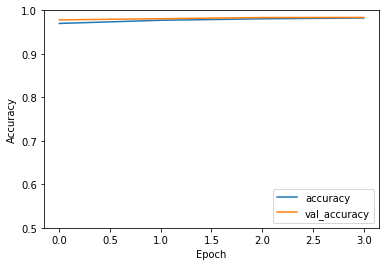

In [136]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  tf.one_hot(y_test,10), verbose=2)